# Maching Learning

In [2]:
import numpy as np
import pandas as pd
import sklearn
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

## 사이킷런 (Scikit-learn)

- 머신러닝 교육을 위한 파이썬 패키지
- https://scikit-learn.org/stable/
- 데이터 전처리(preprocessing)
- 지도 학습(Supervised learning)
    - : KNN, Naive Bayes, Decision Trees, Support Vector Machine
- 비지도 학습(Unsupervised learning)
    - : Clustering, Gaussian mixture models
- 모형 평가 및 선택 (evaluation and selection)
    - : Cross validation, Model evaluation

| 모듈 | 설명 |
|------|------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

### XOR 연산 학습

- 두 값의 각 자릿수를 비교해, 값이 같으면 0, 다르면 1을 계산한다. 

#### 학습데이타 와 레이블 


In [3]:
X = [ [0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]

#### 데이타 학습 -> 모델링

In [5]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [6]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### 데이터 예측 

In [7]:
model.predict(X)

array([0, 1, 1, 0])

In [8]:
model.predict([[1,1]])

array([0])

In [9]:
model.predict([[1,1],[0,0]])

array([0, 0])

#### 모델 평가 : 결과 확인 

- 정답률과 에러률 
```
accuracy_score()
mean_squared_error()
```

In [10]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [13]:
# 정확도 측정
accuracy_score(y, model.predict(X))

1.0

In [12]:
mean_squared_error(y, y)

0.0

#### XOR 연산 머신러닝 - 데이타프레임 활용

In [14]:
data =  [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [15]:
df = pd.DataFrame(data)
df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
X = df[[0,1]]
X

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [17]:
y = df[2]
y

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [18]:
model = SVC()
model.fit(X, y)

SVC()

In [19]:
model.predict(X)

array([0, 1, 1, 0], dtype=int64)

In [20]:
model.predict([[0,0], [1,0]])

array([0, 1], dtype=int64)

In [21]:
result = accuracy_score(y, model.predict(X))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [22]:
# 정답률 
result = mean_squared_error(y, y)
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


## KNN

- k-최근접 이웃 알고리즘
- 새로운 데이터를 입력받았을때 가장 가까이 있는 것은 무엇일까?

<img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99631D335A165F182D00A7'>

### 생선 분류 문제

- 출처 : https://www.kaggle.com/aungpyaeap/fish-market

```
1) 데이터 준비 
    도미와 방어의 길이와 무게 
    X, y 
2) 모델 생성 : KNeighborsClassifier
3) 모델 학습 fit()
4) 평가 score()
5) 예측 predict()
```

#### 도미 데이터 준비하기

In [23]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [24]:
len(bream_length),len(bream_weight)

(35, 35)

#### 빙어 데이터 



In [25]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [26]:
len(smelt_length),len(smelt_weight)

(14, 14)

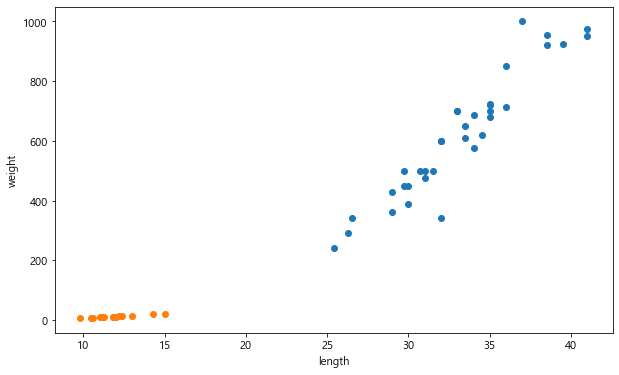

In [28]:
# 도미 데이터와 빙어 데이터 그래프로 그려보기
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
# 리스트 버전 
# 빙어, 도미의 길이 데이타와 무게를 하나의 리스트로 각각 합치기 
# 섞기 shuffle은 배제 => 뒤에 테스트 
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

# zip() 함수를 이용하여 2차원 리스트로 합치기 
fish_data = [[l, w] for l, w in zip(length, weight)]

# print(fish_data)
print(f' {len(fish_data)} 행 {len(fish_data[0])} 열' )

# 생선(도미, 빙어)의 길이와 무게 
# for i, j in fish_data:
#     print(i, j)

 49 행 2 열


In [30]:
# 넘파이 배열 버전 
arr_length = np.array(bream_length+smelt_length).reshape(-1,1)
arr_weight = np.array(bream_length+smelt_length).reshape(-1,1)
print(arr_length.shape, arr_weight.shape)

arr_fish = np.hstack((arr_length, arr_weight))
print(arr_fish.shape)
for i, j in arr_fish:
    print(i, j)

(49, 1) (49, 1)
(49, 2)
25.4 25.4
26.3 26.3
26.5 26.5
29.0 29.0
29.0 29.0
29.7 29.7
29.7 29.7
30.0 30.0
30.0 30.0
30.7 30.7
31.0 31.0
31.0 31.0
31.5 31.5
32.0 32.0
32.0 32.0
32.0 32.0
33.0 33.0
33.0 33.0
33.5 33.5
33.5 33.5
34.0 34.0
34.0 34.0
34.5 34.5
35.0 35.0
35.0 35.0
35.0 35.0
35.0 35.0
36.0 36.0
36.0 36.0
37.0 37.0
38.5 38.5
38.5 38.5
39.5 39.5
41.0 41.0
41.0 41.0
9.8 9.8
10.5 10.5
10.6 10.6
11.0 11.0
11.2 11.2
11.3 11.3
11.8 11.8
11.8 11.8
12.0 12.0
12.2 12.2
12.4 12.4
13.0 13.0
14.3 14.3
15.0 15.0


In [31]:
arr_fish.shape

(49, 2)

In [32]:
df_fish = pd.DataFrame(columns=['length', 'weight'])
df_fish['length']=length
df_fish['weight']=weight
print(df_fish.shape)
df_fish 

(49, 2)


,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [34]:
# 도미와 빙어로 된 리스트 만들기
y = [1]*35 + [0]*14
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model_kn = KNeighborsClassifier()

In [37]:
model_kn.fit(fish_data, y)

KNeighborsClassifier()

In [38]:
model_kn.score(fish_data, y)

1.0

In [41]:
# 분류값 확인하기
model_kn.predict([[38.5, 920.0]])

array([1])

In [42]:
# 분류 값 확인하기
model_kn.predict([[12.4,13.4]])

array([0])

In [44]:
result = accuracy_score(y, model_kn.predict(fish_data))
print(f'정답률은? {result*100} %')

정답률은? 100.0 %


In [45]:
# 에러률 
result = mean_squared_error(y, y)
print(f'에러률은? {result*100} %')

에러률은? 0.0 %


### k-최근접 이웃 알고리즘

- model_kn._fit_X : 학습데이타 X
- model_kn._y : 정답지, 학습데이타 y

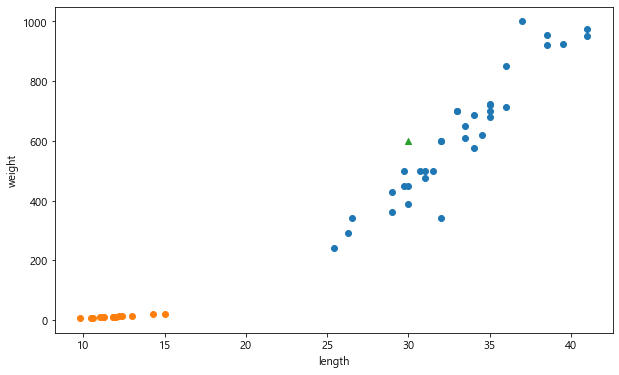

In [46]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
model_kn.predict([[30, 600]])

array([1])

In [48]:
print(model_kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [49]:
print(model_kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [50]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     